### 카이제곱 검정(Chi-square Test)
- 범주형 변수간의 관계를 확인할 때 사용한다 (성별 vs 선호 브랜드, 혈액형 vs 성격)

In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 그래프 기본설정\n",
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12,6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터 생성
# 카이제곱 검정은 원본 데이터가 아니라 집계된 '빈도수 표(도수 분포)'를 입력 받는다.
# 행(row) : 남성, 여성
# 열(col) : 온라인 선호, 오프라인 선호
# 남성 : 온라인 30명, 오프라인 10명 (온라인 선호 경향)
# 여성 : 온라인 10명, 오프라인 30명 (오프라인 선호 경향)
obs = np.array([[30, 10], [10, 30]])
obs

array([[30, 10],
       [10, 30]])

In [3]:
# 카이제곱 독립성 검정
# stats.chi2_contingency(관측빈도표)
# 귀무가설 : 성별과 쇼핑 장소 선호도는 서로 관련이 없다 (유의미하게 관련되어 있지 않다) (독립적이다)
# 대립가설 : 성별과 쇼핑 장소 선호도는 서로 관련이 있다 (유의미하게 관련되어 있다) (독릭적이지 않다)

# 반환값
# chi2 : 검정 통계량 (이 값이 클수록 차이가 크다)
# p_val : P-val
# dof : 자유도
# expected : 귀무가설이 참일 때 나왔어야할 '기대 빈도'표

chi2, p_val, dof, expected = stats.chi2_contingency(obs)
display(chi2)
display(p_val)
display(dof)
display(expected)

np.float64(18.05)

np.float64(2.1517864378120194e-05)

1

array([[20., 20.],
       [20., 20.]])

In [4]:
# 그래프를 그리기 위해 데이터 프레임을 생성한다.
df_chi = pd.DataFrame(obs, columns=['온라인', '오프라인'], index=['남성', '여성'])
df_chi

,온라인,오프라인
남성,30,10
여성,10,30


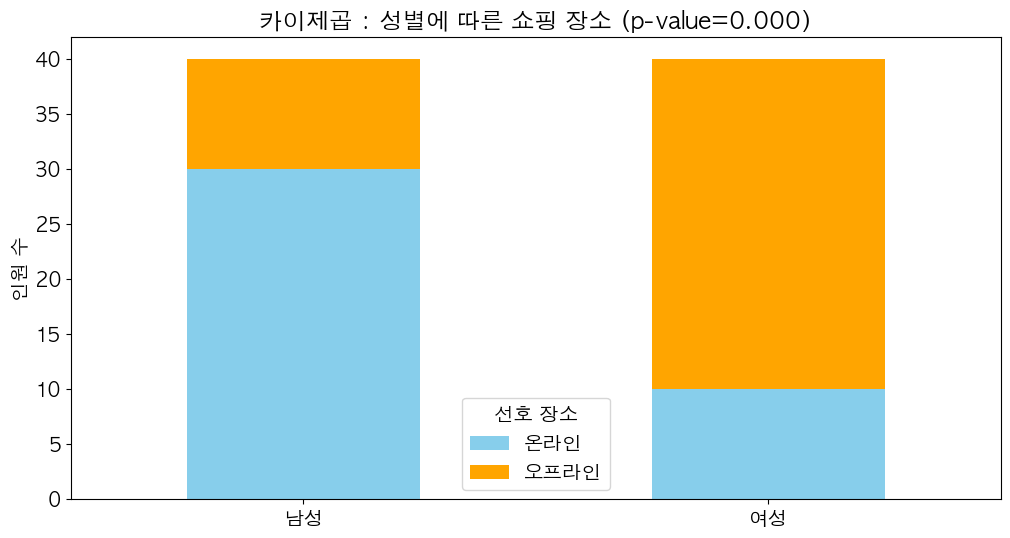

In [5]:
# 누적 막대 그래프를 그린다.
# 카이제곱 시각화의 핵심은 '비율의 차이'를 보여주는 것이다.
df_chi.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])

plt.title(f'카이제곱 : 성별에 따른 쇼핑 장소 (p-value={p_val:.3f})')
plt.xticks(rotation=0)

plt.ylabel('인원 수')
plt.legend(title='선호 장소')
plt.show()

- 카이제곱 검증 결과 p value가 0.05보다 작은 0.00002 이므로 '성별에 따른 쇼핑 장소 선호는 서로 유의미한 상관관계가 없다'라는 귀무가설은 기각한다.
- 따라서 '성별에 따른 쇼핑 장소 선호는 서로 유의미한 상관관계가 있다'라고 볼 수 있다.
- 시각화 하였을 때 남성은 온라인 쇼핑을 선호하고 여성은 오프라인 쇼핑을 선호한다.